In [1]:
import numpy as np
import datetime
from collections import Counter
import pandas as pd
import re
import matplotlib.pyplot as plt
import random

In [64]:
reports = pd.read_csv("all_data.csv", encoding =  "ISO-8859-1")

In [211]:
reports['IncidentType'] = [ addy.lstrip().rstrip() for addy in reports['IncidentType'] ]
incidents = reports['IncidentType'].str.strip().value_counts()
incidents[incidents >400]

Robbery                 2519
Weapons Violation       1819
Battery                  992
Theft                    718
Residential Burglary     608
Arrested Person          576
Traffic Incident         432
Fraud                    429
Name: IncidentType, dtype: int64

In [137]:
intrested = incidents[incidents> 600].index.tolist()
intrested = [str(incident) for incident in intrested]
year_bucket = {}
rob= 0
for tup in zip(reports['Year'], reports['IncidentType']):
    i+=1
    year = str(tup[0])
    incident = tup[1].lstrip().rstrip()
    if incident not in intrested:
        continue
    if year not in year_bucket:        
        year_bucket[year] = {incident: 1}
        continue
    else:
        bucket = year_bucket[year]
        if incident in bucket:
            bucket[incident] += 1
        else:
            bucket[incident] = 1


In [138]:
year_bucket

{'2005': {'Residential Burglary': 5,
  'Weapons Violation': 43,
  'Battery': 20,
  'Theft': 10,
  'Robbery': 62},
 '2006': {'Robbery': 137,
  'Battery': 25,
  'Weapons Violation': 41,
  'Theft': 4,
  'Residential Burglary': 18},
 '2007': {'Robbery': 90,
  'Weapons Violation': 40,
  'Battery': 30,
  'Theft': 17,
  'Residential Burglary': 11},
 '2008': {'Weapons Violation': 61,
  'Robbery': 185,
  'Theft': 15,
  'Battery': 48,
  'Residential Burglary': 36},
 '2009': {'Robbery': 270,
  'Weapons Violation': 95,
  'Theft': 43,
  'Battery': 114,
  'Residential Burglary': 46},
 '2010': {'Weapons Violation': 111,
  'Robbery': 239,
  'Battery': 81,
  'Residential Burglary': 59,
  'Theft': 41},
 '2020': {'Residential Burglary': 17,
  'Theft': 26,
  'Weapons Violation': 42,
  'Robbery': 38,
  'Battery': 12},
 '1962': {'Robbery': 1},
 '2011': {'Weapons Violation': 100,
  'Residential Burglary': 43,
  'Robbery': 180,
  'Theft': 41,
  'Battery': 108},
 '2012': {'Robbery': 161,
  'Weapons Violation':

In [271]:
before = ['2009' ,'2010', '2011', '2012', '2013', '2014']
years = ['2015', '2016' , '2017', '2018', '2019']
years = years #before + years
filtered_years = {}
for year in years:
    filtered_years[year] = year_bucket[year]
filtered_years

{'2015': {'Robbery': 140,
  'Battery': 71,
  'Theft': 79,
  'Weapons Violation': 154,
  'Residential Burglary': 37},
 '2016': {'Weapons Violation': 161,
  'Robbery': 139,
  'Residential Burglary': 37,
  'Battery': 48,
  'Theft': 52},
 '2017': {'Robbery': 170,
  'Weapons Violation': 209,
  'Theft': 56,
  'Battery': 55,
  'Residential Burglary': 28},
 '2018': {'Theft': 63,
  'Robbery': 198,
  'Weapons Violation': 216,
  'Residential Burglary': 54,
  'Battery': 44},
 '2019': {'Robbery': 137,
  'Theft': 53,
  'Weapons Violation': 172,
  'Battery': 37,
  'Residential Burglary': 83}}

In [275]:
df = pd.DataFrame(filtered_years).T.fillna(0).astype(int)
cols = list(df.columns.values)
new_cols = ['Weapons Violation', 'Robbery','Theft', 'Battery',  'Residential Burglary']
df2 = df[new_cols]
peak = df2.loc[str(2019), "Residential Burglary"]
prev = df2.loc[str(2018), "Residential Burglary"]
mean = df2["Residential Burglary"].describe()['mean']
peak/prev

1.537037037037037

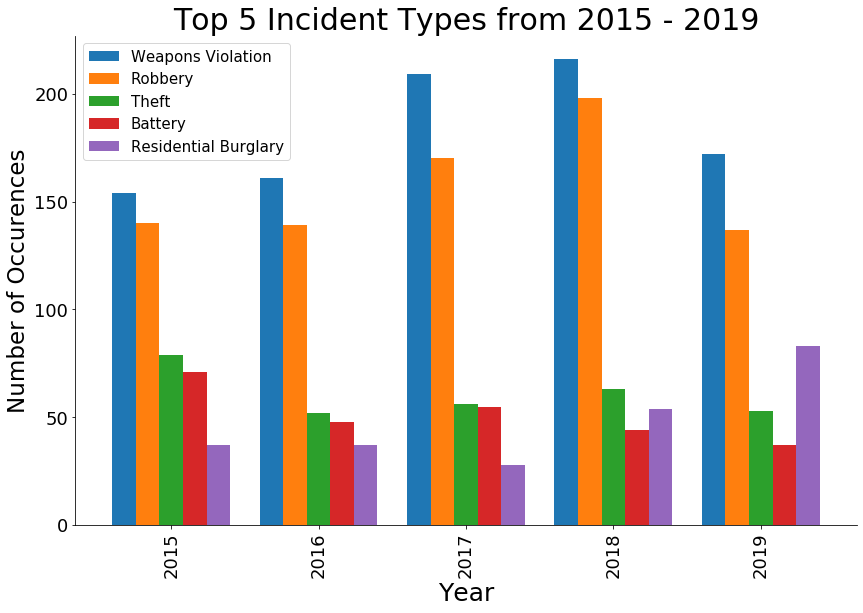

In [276]:
fig, ax = plt.subplots(1, figsize = (14,9))
df2.plot.bar(ax = ax, width = 0.8, legend = True)
ax.legend(df2.columns.values,prop= {"size":15})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Top 5 Incident Types from 2015 - 2019", size = 30)
ax.set_ylabel("Number of Occurences", size = 23)
ax.set_xlabel("Year", size = 25)
ax.tick_params(axis='both', which='major', labelsize=18)
#plt.savefig("IncidentTypesBarFrom20152019.png", bbox_inches = None)
None

In [300]:
incidents = reports[(reports['IncidentType'] == 'Residential Burglary')]
years = incidents[(incidents['Year'] >= 2015) & (incidents['Year']!= 2020)]
df = years[["Year" , 'Lat', "Lon"]]
df ## Plot Per Year TO DO

,Year,Lat,Lon
8482,2015,43.039123,-89.487352
8502,2015,43.049098,-89.341752
8517,2015,43.029673,-89.417746
8561,2015,43.103040,-89.343183
8600,2015,43.068241,-89.402486
...,...,...,...
12886,2019,43.077641,-89.382363
12893,2019,43.071273,-89.492076
12920,2019,43.072067,-89.288851
12930,2019,43.152592,-89.373499
